<a href="https://colab.research.google.com/github/mansi1189/Natural-Language-Processing/blob/master/NER_using_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [37]:
!pip install keras==2.1.6 

     |████████████████████████████████| 348kB 2.8MB/s 
  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [0]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [0]:
data = data.fillna(method="ffill")

In [4]:
words = list(set(data["Word"].values))
n_words = len(words); n_words

35178

In [5]:
tags = list(set(data["Tag"].values))
n_tags = len(tags); n_tags

17

In [0]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [0]:

getter = SentenceGetter(data)

In [0]:
sent = getter.get_next()

In [10]:
print(sent)

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [0]:
sentences = getter.sentences

In [12]:
sentences[:10]

[[('Thousands', 'NNS', 'O'),
  ('of', 'IN', 'O'),
  ('demonstrators', 'NNS', 'O'),
  ('have', 'VBP', 'O'),
  ('marched', 'VBN', 'O'),
  ('through', 'IN', 'O'),
  ('London', 'NNP', 'B-geo'),
  ('to', 'TO', 'O'),
  ('protest', 'VB', 'O'),
  ('the', 'DT', 'O'),
  ('war', 'NN', 'O'),
  ('in', 'IN', 'O'),
  ('Iraq', 'NNP', 'B-geo'),
  ('and', 'CC', 'O'),
  ('demand', 'VB', 'O'),
  ('the', 'DT', 'O'),
  ('withdrawal', 'NN', 'O'),
  ('of', 'IN', 'O'),
  ('British', 'JJ', 'B-gpe'),
  ('troops', 'NNS', 'O'),
  ('from', 'IN', 'O'),
  ('that', 'DT', 'O'),
  ('country', 'NN', 'O'),
  ('.', '.', 'O')],
 [('Iranian', 'JJ', 'B-gpe'),
  ('officials', 'NNS', 'O'),
  ('say', 'VBP', 'O'),
  ('they', 'PRP', 'O'),
  ('expect', 'VBP', 'O'),
  ('to', 'TO', 'O'),
  ('get', 'VB', 'O'),
  ('access', 'NN', 'O'),
  ('to', 'TO', 'O'),
  ('sealed', 'JJ', 'O'),
  ('sensitive', 'JJ', 'O'),
  ('parts', 'NNS', 'O'),
  ('of', 'IN', 'O'),
  ('the', 'DT', 'O'),
  ('plant', 'NN', 'O'),
  ('Wednesday', 'NNP', 'B-tim'),
  ('

In [0]:
max_len = 75
max_len_char = 10

In [0]:
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [12]:
print(word2idx["Obama"])
print(tag2idx["B-geo"])

29868
5


In [13]:
from keras.preprocessing.sequence import pad_sequences
X_word = [[word2idx[w[0]] for w in s] for s in sentences]

Using TensorFlow backend.


In [0]:
X_word = pad_sequences(maxlen=max_len, sequences=X_word, value=word2idx["PAD"], padding='post', truncating='post')

In [15]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)

98


In [0]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}

char2idx["UNK"] = 1
char2idx["PAD"] = 0
  

In [0]:
X_char = []
for sentence in sentences:
    sent_seq = []
    for i in range(max_len):#max_len=75
        word_seq = []
        for j in range(max_len_char):#max_len_char=10
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))

In [0]:
char2idx.get(sentences[2][0][1])

In [19]:

sentences[2][0][1]

'NN'

In [0]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]

In [0]:
x=[]
for s in sentences:
  for w in s:
    x.append(tag2idx[w[2]])

In [0]:
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:

X_word_tr, X_word_te, y_tr, y_te = train_test_split(X_word, y, test_size=0.1, random_state=2018)
X_char_tr, X_char_te, _, _ = train_test_split(X_char, y, test_size=0.1, random_state=2018)

In [0]:

from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D

In [26]:
# input and embedding for words
word_in = Input(shape=(max_len,))
emb_word = Embedding(input_dim=n_words + 2, output_dim=20,
                     input_length=max_len, mask_zero=True)(word_in)

#input dim=35178, output dim= 20 , param= ip*op

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# input and embeddings for characters
char_in = Input(shape=(max_len, max_len_char,))
emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=10,
                           input_length=max_len_char, mask_zero=True))(char_in)
#ip=  98+2,op=10,param=ip*op

In [28]:
# character LSTM to get word encodings by characters
char_enc = TimeDistributed(LSTM(units=20, return_sequences=False,
                                recurrent_dropout=0.5))(emb_char)

#ip= 10,op=20 ,param= 4*(ip*op +(op)^2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:

# main LSTM
x = concatenate([emb_word, char_enc])
x = SpatialDropout1D(0.3)(x)
main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,
                               recurrent_dropout=0.6))(x)
#ip=20 op=50 , param= 8*(ip*op +(op)^2)

In [0]:
#param=1818, ip=100,op=18,param= 100*18 +18

out = TimeDistributed(Dense(n_tags + 1, activation="softmax"))(main_lstm)

model = Model([word_in, char_in], out)

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [32]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 75, 10)       0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 75)           0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 75, 10, 10)   1000        input_2[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 75, 20)       703600      input_1[0][0]                    
__________________________________________________________________________________________________
time_distr

In [33]:
history = model.fit([X_word_tr,
                     np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))],
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=32, epochs=10, validation_split=0.1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 38846 samples, validate on 4317 samples
Epoch 1/10
38846/38846 [==============================] - 253s 7ms/step - loss: 0.3996 - acc: 0.9027 - val_loss: 0.1680 - val_acc: 0.9526
Epoch 2/10
38846/38846 [==============================] - 251s 6ms/step - loss: 0.1431 - acc: 0.9591 - val_loss: 0.1232 - val_acc: 0.9637
Epoch 3/10
38846/38846 [==============================] - 254s 7ms/step - loss: 0.1107 - acc: 0.9679 - val_loss: 0.1117 - val_acc: 0.9669
Epoch 4/10
38846/38846 [==============================] - 255s 7ms/step - loss: 0.0969 - acc: 0.9712 - val_loss: 0.1081 - val_acc: 0.9683
Epoch 5/10
38846/38846 [==============================] - 252s 6ms/step - loss: 0.0882 - acc: 0.9733 - val_loss: 0.1055 - val_acc: 0.9686
Epoch 6/10
38846/38846 [==============================] - 249s 6ms/step - loss: 0.0831 - acc: 0.9745 - val_loss: 0.1028 - val_acc: 0.9692
Epoch 7/10
38846/38846 [==============================] - 250s 6ms/step - l

In [0]:
hist = pd.DataFrame(history.history)

In [0]:
model.save('new.h5')

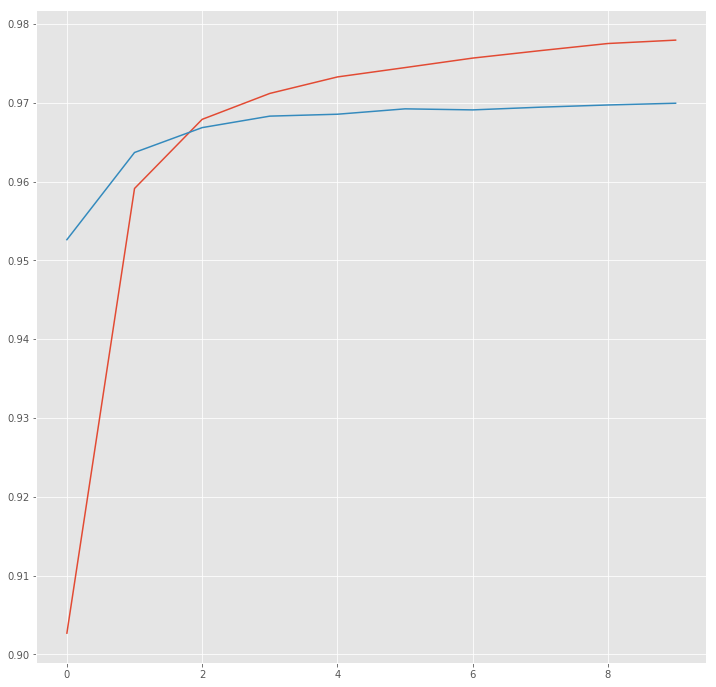

In [35]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()

In [0]:
y_pred = model.predict([X_word_te,
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char))])


In [37]:
i = 1923
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_word_te[i], y_te[i], p):
    if w != 0:
        print("{:15}: {:5} {}".format(idx2word[w], idx2tag[t], idx2tag[pred]))

Word           ||True ||Pred
North          : B-geo B-geo
Korea          : I-geo I-geo
's             : O     O
nuclear        : O     O
weapons        : O     O
program        : O     O
will           : O     O
be             : O     O
the            : O     O
focus          : O     O
of             : O     O
her            : O     O
meetings       : O     O
in             : O     O
Tokyo          : B-geo B-geo
,              : O     O
Seoul          : B-geo B-geo
and            : O     O
Beijing        : B-geo B-geo
.              : O     O


!git remote add origin https://github.com/mansi1189/Natural-Language-Processing.git

!git config --global user.email "mansi.deolalikar@gmail.com"
!git config --global user.name "Mansi Deolalikar"

""